In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
     

C:\Users\sabri\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [5]:
stock = pd.read_csv("Stocks_ClosePrice.csv")
stock

,Date,FB,GOOG,NFLX,AMZN,AAPL,FB.1,GOOG.1,NFLX.1,AMZN.1,AAPL.1
0,2018/9/24,165.410004,1173.369995,369.609985,1934.359985,220.789993,NaN,NaN,NaN,NaN,NaN
1,2018/9/25,164.910004,1184.650024,369.429993,1974.550049,222.190002,-0.003027,0.009567,-0.000487,0.020564,0.006321
2,2018/9/26,166.949997,1180.489990,377.880005,1974.849976,220.419998,0.012294,-0.003518,0.022615,0.000152,-0.007998
3,2018/9/27,168.839996,1194.640015,380.709991,2012.979980,224.949997,0.011257,0.011915,0.007461,0.019124,0.020343
4,2018/9/28,164.460007,1193.469971,374.130005,2003.000000,225.740005,-0.026284,-0.000980,-0.017435,-0.004970,0.003506
...,...,...,...,...,...,...,...,...,...,...,...
245,2019/9/16,186.220001,1231.300049,294.290009,1807.839966,219.899994,-0.005195,-0.006686,0.000476,-0.017274,0.005243
246,2019/9/17,188.080002,1229.150024,298.600006,1822.550049,220.699997,0.009939,-0.001748,0.014539,0.008104,0.003631
247,2019/9/18,188.139999,1232.410034,291.559998,1817.459961,222.770004,0.000319,0.002649,-0.023859,-0.002797,0.009336
248,2019/9/19,190.139999,1238.709961,286.600006,1821.500000,220.960007,0.010574,0.005099,-0.017158,0.002220,-0.008158


In [7]:
returns = stock[['FB.1', 'GOOG.1', 'NFLX.1', 'AMZN.1', 'AAPL.1']]
mean_returns = returns.mean()
std_returns = returns.std()

print("Mean Returns:")
print(mean_returns)
print("\nStandard Deviation of Returns:")
print(std_returns)

Mean Returns:
FB.1      0.000555
GOOG.1    0.000189
NFLX.1   -0.001250
AMZN.1   -0.000302
AAPL.1   -0.000056
dtype: float64

Standard Deviation of Returns:
FB.1      0.020943
GOOG.1    0.018474
NFLX.1    0.027119
AMZN.1    0.022313
AAPL.1    0.020421
dtype: float64


C:\Users\sabri\AppData\Local\Temp\ipykernel_29124\4151390524.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(txt, (std_returns[i], mean_returns[i]), fontsize=12, ha='right')


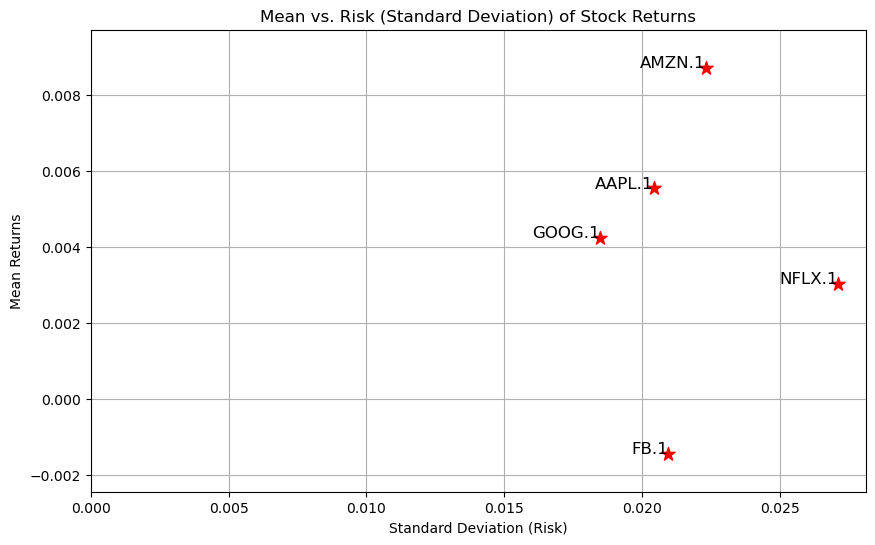

In [25]:
plt.figure(figsize=(10, 6))
plt.scatter(std_returns, mean_returns, color='red', s=100, marker='*')

# Adding labels and title
for i, txt in enumerate(mean_returns.index):
    plt.annotate(txt, (std_returns[i], mean_returns[i]), fontsize=12, ha='right')

plt.title('Mean vs. Risk (Standard Deviation) of Stock Returns')
plt.xlabel('Standard Deviation (Risk)')
plt.ylabel('Mean Returns')
plt.grid(True)
plt.xlim(0, std_returns.max() + 0.001)  # Adjusting x-axis limit for better visibility
plt.ylim(mean_returns.min() - 0.001, mean_returns.max() + 0.001)  # Adjusting y-axis limit for better visibility

# Show plot
plt.show()

In [10]:
# Randomly select weights
num_stocks = len(mean_returns)
random_weights = np.random.rand(num_stocks)
random_weights /= np.sum(random_weights)  # Normalize to sum to 1

# Calculate portfolio mean and standard deviation
portfolio_mean = np.dot(random_weights, mean_returns)
portfolio_std = np.sqrt(np.dot(random_weights**2, std_returns**2))

# Print results
print("Random Weights:", random_weights)
print("Portfolio Mean Return:", portfolio_mean)
print("Portfolio Standard Deviation (Risk):", portfolio_std)

Random Weights: [0.26352048 0.24899109 0.2630091  0.16768739 0.05679193]
Portfolio Mean Return: -0.0001892519522574412
Portfolio Standard Deviation (Risk): 0.010855230401198727


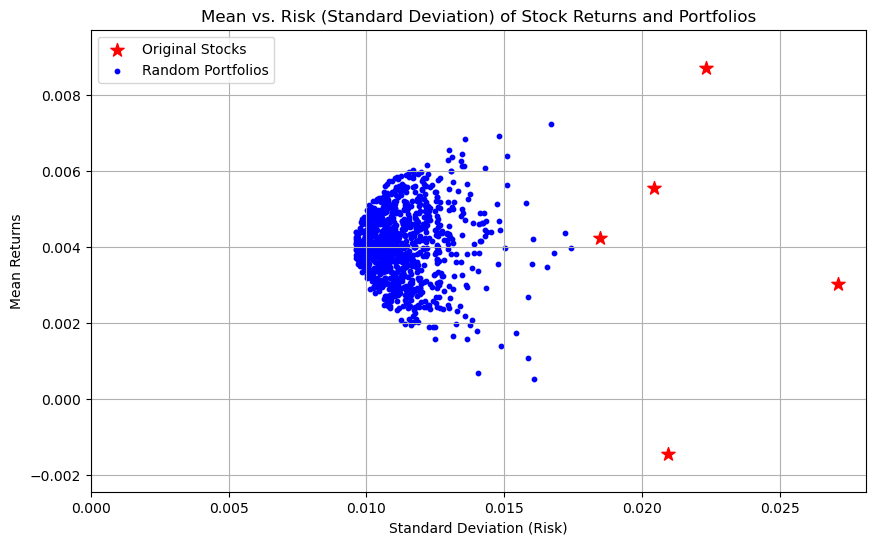

In [24]:
# Store portfolio means and standard deviations
portfolio_means = []
portfolio_stds = []

# Repeat for 1000 portfolios
num_portfolios = 1000
for _ in range(num_portfolios):
    # Randomly select weights
    random_weights = np.random.rand(len(mean_returns))
    random_weights /= np.sum(random_weights)  # Normalize to sum to 1

    # Calculate portfolio mean and standard deviation
    portfolio_mean = np.dot(random_weights, mean_returns)
    portfolio_std = np.sqrt(np.dot(random_weights**2, std_returns**2))

    # Store results
    portfolio_means.append(portfolio_mean)
    portfolio_stds.append(portfolio_std)

# Convert results to numpy arrays for easier plotting
portfolio_means = np.array(portfolio_means)
portfolio_stds = np.array(portfolio_stds)

# Plotting
plt.figure(figsize=(10, 6))

# Plot the original mean and risk
plt.scatter(std_returns, mean_returns, color='red', s=100, marker='*', label='Original Stocks')

# Plot the portfolios
plt.scatter(portfolio_stds, portfolio_means, color='blue', s=10, label='Random Portfolios')

# Adding labels and title
plt.title('Mean vs. Risk (Standard Deviation) of Stock Returns and Portfolios')
plt.xlabel('Standard Deviation (Risk)')
plt.ylabel('Mean Returns')
plt.grid(True)
plt.xlim(0, std_returns.max() + 0.001)  # Adjusting x-axis limit for better visibility
plt.ylim(mean_returns.min() - 0.001, mean_returns.max() + 0.001)  # Adjusting y-axis limit for better visibility
plt.legend()

# Show plot
plt.show()

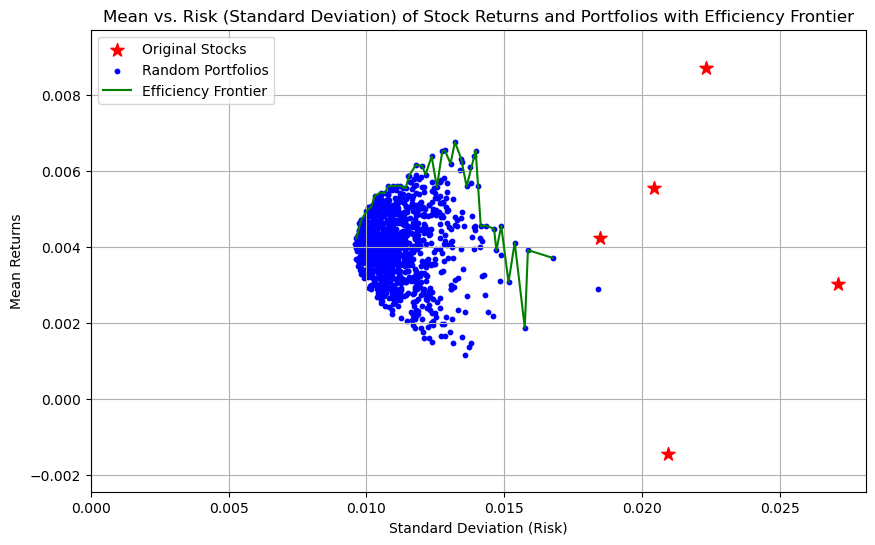

In [23]:
# Store portfolio means and standard deviations
portfolio_means = []
portfolio_stds = []

# Repeat for 1000 portfolios
num_portfolios = 1000
for _ in range(num_portfolios):
    # Randomly select weights
    random_weights = np.random.rand(len(mean_returns))
    random_weights /= np.sum(random_weights)  # Normalize to sum to 1

    # Calculate portfolio mean and standard deviation
    portfolio_mean = np.dot(random_weights, mean_returns)
    portfolio_std = np.sqrt(np.dot(random_weights**2, std_returns**2))

    # Store results
    portfolio_means.append(portfolio_mean)
    portfolio_stds.append(portfolio_std)

# Convert results to numpy arrays for easier plotting
portfolio_means = np.array(portfolio_means)
portfolio_stds = np.array(portfolio_stds)

# Create a figure for plotting
plt.figure(figsize=(10, 6))

# Plot the original mean and risk
plt.scatter(std_returns, mean_returns, color='red', s=100, marker='*', label='Original Stocks')

# Plot the portfolios
plt.scatter(portfolio_stds, portfolio_means, color='blue', s=10, label='Random Portfolios')

# Create bins for risk levels
num_bins = 100  # Adjust number of bins as needed
bins = np.linspace(0, portfolio_stds.max(), num_bins)

# Store the highest return portfolio for each risk bin
efficient_frontier = []

for i in range(len(bins) - 1):
    # Get portfolios within the bin
    indices_in_bin = np.where((portfolio_stds >= bins[i]) & (portfolio_stds < bins[i + 1]))[0]
    if len(indices_in_bin) > 0:
        # Get the portfolio with the maximum return in the bin
        max_return_index = indices_in_bin[np.argmax(portfolio_means[indices_in_bin])]
        efficient_frontier.append((portfolio_stds[max_return_index], portfolio_means[max_return_index]))

# Convert to numpy array for plotting
efficient_frontier = np.array(efficient_frontier)

# Plot the efficiency frontier
plt.plot(efficient_frontier[:, 0], efficient_frontier[:, 1], color='green', label='Efficiency Frontier')

# Adding labels and title
plt.title('Mean vs. Risk (Standard Deviation) of Stock Returns and Portfolios with Efficiency Frontier')
plt.xlabel('Standard Deviation (Risk)')
plt.ylabel('Mean Returns')
plt.grid(True)
plt.xlim(0, std_returns.max() + 0.001)  # Adjusting x-axis limit for better visibility
plt.ylim(mean_returns.min() - 0.001, mean_returns.max() + 0.001)  # Adjusting y-axis limit for better visibility
plt.legend()

# Show plot
plt.show()

Yes. Efficient frontier represents the best possible set of portfolios.